In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pickle

In [2]:
df = pd.read_csv('Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.dropna()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [4]:
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor, X, y, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-3493.0403279178936


In [5]:
ridge = Ridge()
param = {'alpha':[1e-15, 1e-10, 1e-8, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [6]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-3383.117673600511


In [7]:
lasso = Lasso()
param = {'alpha':[1e-15, 1e-10, 1e-8, 1e-2, 1, 5, 10, 20]}
lasso = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=5)
lasso.fit(X,y)

C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.324e+05, tolerance: 4.247e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.976e+05, tolerance: 3.871e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.590e+05, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [8]:
print(lasso.best_params_)
print(lasso.best_score_)

{'alpha': 5}
-3354.744534286481


C:\Users\madha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VM', ylabel='Density'>

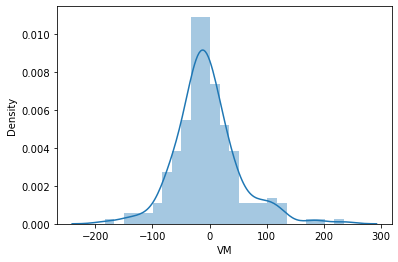

In [9]:
prediction = lasso.predict(X_test)
sns.distplot(y_test-prediction)

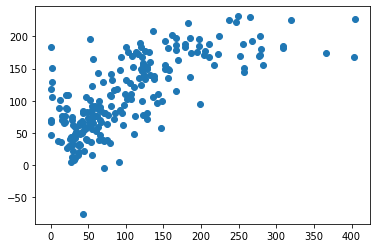

In [10]:
plt.scatter(y_test, prediction)

In [11]:
print("MAE: ",metrics.c(y_test, prediction))
print("MSE: ",metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

AttributeError: module 'sklearn.metrics' has no attribute 'c'